# Problem Description¶


- This dataset consists of reviews of fine foods from amazon. The data span a period of more than 10 years, including all ~500,000 reviews up to October 2012. Reviews include product and user information, ratings, and a plain text review. It also includes reviews from all other Amazon categories.


- Data includes:

    - Reviews from Oct 1999 - Oct 2012
    - 568,454 reviews
    - 256,059 users
    - 74,258 products
    - 260 users with > 50 reviews
    

- Dataset link : https://www.kaggle.com/snap/amazon-fine-food-reviews?select=Reviews.csv

In [10]:
import os, sys

import pandas as pd
import numpy as np

import nltk 
#nltk.download('stopwords')
from nltk.corpus import stopwords

import string # Removing special characters {#, @, ...}
import re # Regex Package

from nltk.stem import SnowballStemmer, WordNetLemmatizer , LancasterStemmer , PorterStemmer
# Stemmer & Lemmatizer
#from gensim.utils import simple_preprocess  # Text ==> List of Tokens

# Text Embedding
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import preprocessing

# Modelling
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

# Saving Model
import pickle

# Visualization Packages
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=1.3)
%matplotlib inline

In [16]:
df = pd.read_csv("Crop_recommendation.csv")
df.drop_duplicates(inplace = True)
df['no_label'] = pd.Categorical(df.label).codes
df.no_label.value_counts()

21    100
19    100
2     100
4     100
6     100
8     100
10    100
12    100
14    100
16    100
18    100
20    100
1     100
3     100
5     100
7     100
9     100
11    100
13    100
15    100
17    100
0     100
Name: no_label, dtype: int64

In [18]:
X = df[["N","P","K","temperature","humidity","ph" ,"rainfall","no_label"]].values
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

Y = df.no_label.values

X_train ,X_test,y_train,y_test = train_test_split(X,Y, test_size= .2 , random_state =22)

In [21]:
print(X_train.shape,"  ",X_test.shape)
print(y_train.shape,"  ",y_test.shape)

(1760, 8)    (440, 8)
(1760,)    (440,)


In [23]:
k= 25
score = np.zeros((k-1))

for n in range(1,k):

    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train , y_train)
    y_hat_test = neigh.predict(X_test)
    score[n-1] = accuracy_score(y_test ,y_hat_test)*100

print(score)

#print('Training accuracy = %.2f' % accuracy_score(y_train , y_hat_train))
#print('Testing accuracy = %.2f' % accuracy_score(y_test ,y_hat_test))

[ 99.77272727  99.77272727 100.         100.         100.
 100.         100.          99.77272727 100.          99.77272727
 100.          99.77272727  99.77272727  99.77272727  99.54545455
  99.54545455  99.54545455  99.54545455  99.54545455  99.54545455
  99.54545455  99.54545455  99.09090909  99.09090909]


In [43]:
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [44]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [45]:
models = {
    LogisticRegression(max_iter=500):'Logistic Regression',
    RandomForestClassifier():'Random Forest',
    SVC():'Support Vector Machine'
}
for m in models.keys():
    m.fit(X_train,y_train)
for model,name in models.items():
     print(f"Accuracy Score for {name} is : ",model.score(X_test,y_test)*100,"%")

Accuracy Score for Logistic Regression is :  97.72727272727273 %
Accuracy Score for Random Forest is :  99.54545454545455 %
Accuracy Score for Support Vector Machine is :  99.0909090909091 %


In [46]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [47]:
y_pred = rf.predict(X_test)

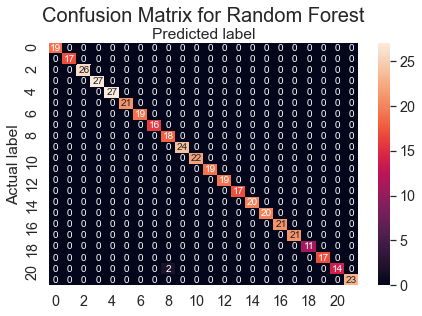

In [48]:
class_names = np.arange(0,21)
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
cnf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True,fmt = 'd')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title(f'Confusion Matrix for Random Forest', {'fontsize':20})
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [4]:
data_text = df.copy()
data_text.head(4)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice


In [5]:
data_text.drop_duplicates(inplace = True)

# Target Variable Pre-Processing

In [6]:
data_text["target"] = data_text['label']
data_text.head(3)

,N,P,K,temperature,humidity,ph,rainfall,label,target
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,rice


In [9]:
data_text["target"].value_counts()

mungbean       100
lentil         100
muskmelon      100
cotton         100
coffee         100
maize          100
banana         100
jute           100
apple          100
grapes         100
mothbeans      100
watermelon     100
kidneybeans    100
orange         100
blackgram      100
chickpea       100
mango          100
coconut        100
rice           100
pomegranate    100
papaya         100
pigeonpeas     100
Name: target, dtype: int64

In [10]:
data_text.dropna(inplace = True , axis = 0)

data_text = data_text.reset_index(drop=True)

data_text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
 8   target       2200 non-null   object 
dtypes: float64(4), int64(3), object(2)
memory usage: 154.8+ KB


# Plot Countplot for target Variable


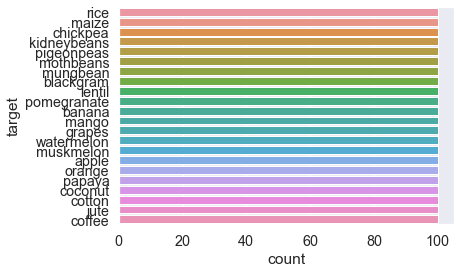

In [18]:
sns.countplot(y = "target", data = data_text)


In [9]:
NEG_N = data_text.target.value_counts()[0]
df_pos = data_text[data_text['target'] == 1]['Text'].sample(NEG_N, replace=False)
data_balanced = pd.concat([data_text.iloc[df_pos.index], data_text[data_text.target == 0]])

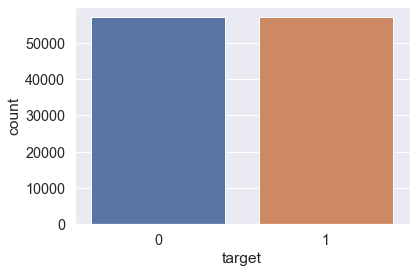

In [10]:
sns.countplot(x = "target" , data = data_balanced)

# Text Pre-Processing


In [11]:
data_balanced["New text"] = data_balanced["Text"].str.lower()
data_balanced["New text"] = data_balanced["New text"].apply(lambda x: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", x))
data_balanced["New text"] = data_balanced["New text"].apply(lambda x: re.sub(r"\d+", "", x))
data_balanced.head()

,Text,Score,target,New text
380471,Yunnan province on the mighty Mekong river in ...,4,1,yunnan province on the mighty mekong river in ...
95540,My 14 yr.old grandson was diagnosed with Celia...,5,1,my yrold grandson was diagnosed with celiac i...
322633,I love this stuff. I grew up with it and passe...,5,1,i love this stuff i grew up with it and passed...
230645,My dog was scratching like crazy and our vet r...,5,1,my dog was scratching like crazy and our vet r...
24487,There's something off about the pasta. While m...,3,1,theres something off about the pasta while muc...


In [12]:
stop = stopwords.words('english')
data_balanced["New text"] = data_balanced["New text"].apply(lambda x: " ".join([i for i in x.split() if i not in stop]))

In [13]:
#nltk.download('punkt')
#data_balanced[["Text","New text"]]

# Stemming
1- Tokenizing words

In [14]:
from nltk.tokenize import word_tokenize

data_balanced["tkonize"] = data_balanced["New text"].apply(lambda x : word_tokenize(x))

In [15]:
data_balanced.head()

,Text,Score,target,New text,tkonize
380471,Yunnan province on the mighty Mekong river in ...,4,1,yunnan province mighty mekong river southweste...,"[yunnan, province, mighty, mekong, river, sout..."
95540,My 14 yr.old grandson was diagnosed with Celia...,5,1,yrold grandson diagnosed celiac july searching...,"[yrold, grandson, diagnosed, celiac, july, sea..."
322633,I love this stuff. I grew up with it and passe...,5,1,love stuff grew passed along tradition kids al...,"[love, stuff, grew, passed, along, tradition, ..."
230645,My dog was scratching like crazy and our vet r...,5,1,dog scratching like crazy vet recommended natu...,"[dog, scratching, like, crazy, vet, recommende..."
24487,There's something off about the pasta. While m...,3,1,theres something pasta much closer regular pas...,"[theres, something, pasta, much, closer, regul..."


In [16]:
def stem(x):
    stemmer = SnowballStemmer("english")
    word = [stemmer.stem(i) for i in x]
    return word

data_balanced["Stem-words"] = data_balanced["tkonize"].apply(lambda x : stem(x))
data_balanced["Stem-words"] = data_balanced["tkonize"].apply(lambda x : " ".join(x))


In [17]:
data_balanced["Stem-words"]

380471    yunnan province mighty mekong river southweste...
95540     yrold grandson diagnosed celiac july searching...
322633    love stuff grew passed along tradition kids al...
230645    dog scratching like crazy vet recommended natu...
24487     theres something pasta much closer regular pas...
                                ...                        
393654    bought soup today local grocer brought back wo...
393655    soup mostly broth although kick also sweet tas...
393656    mostly broth advertised cup vegetables however...
393667    ordered months back great latest batch terribl...
393671    im disappointed flavor chocolate notes especia...
Name: Stem-words, Length: 114168, dtype: object

2- Lemmatization

In [18]:
def lemmat(word):
    lemmatizer = WordNetLemmatizer()
    lem_text = [lemmatizer.lemmatize(i) for i in word]
    return lem_text

data_balanced['Lemmatize-words'] = data_balanced['tkonize'].apply(lambda x: lemmat(x))
data_balanced['Lemmatize-words'] = data_balanced['Lemmatize-words'].apply(lambda x: " ".join(x))
data_balanced.head(2)

,Text,Score,target,New text,tkonize,Stem-words,Lemmatize-words
380471,Yunnan province on the mighty Mekong river in ...,4,1,yunnan province mighty mekong river southweste...,"[yunnan, province, mighty, mekong, river, sout...",yunnan province mighty mekong river southweste...,yunnan province mighty mekong river southweste...
95540,My 14 yr.old grandson was diagnosed with Celia...,5,1,yrold grandson diagnosed celiac july searching...,"[yrold, grandson, diagnosed, celiac, july, sea...",yrold grandson diagnosed celiac july searching...,yrold grandson diagnosed celiac july searching...


In [21]:
data_balanced.drop(["tkonize"] , axis = 1 , inplace = True)

In [22]:
data_balanced.head()

,Text,Score,target,New text,Stem-words,Lemmatize-words
380471,Yunnan province on the mighty Mekong river in ...,4,1,yunnan province mighty mekong river southweste...,yunnan province mighty mekong river southweste...,yunnan province mighty mekong river southweste...
95540,My 14 yr.old grandson was diagnosed with Celia...,5,1,yrold grandson diagnosed celiac july searching...,yrold grandson diagnosed celiac july searching...,yrold grandson diagnosed celiac july searching...
322633,I love this stuff. I grew up with it and passe...,5,1,love stuff grew passed along tradition kids al...,love stuff grew passed along tradition kids al...,love stuff grew passed along tradition kid als...
230645,My dog was scratching like crazy and our vet r...,5,1,dog scratching like crazy vet recommended natu...,dog scratching like crazy vet recommended natu...,dog scratching like crazy vet recommended natu...
24487,There's something off about the pasta. While m...,3,1,theres something pasta much closer regular pas...,theres something pasta much closer regular pas...,there something pasta much closer regular past...


# Split Test & Training Data

In [20]:
X = data_text[:8].copy()
Y = data_text["target"]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3 ,random_state=0)

ValueError: Found input variables with inconsistent numbers of samples: [8, 2200]

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer 

vectorizer = TfidfVectorizer()
vectorizer_tfidf  = vectorizer.fit(X_train)

X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

In [25]:
print("Number of rows =" ,X_train.shape)
print("Number of rows =" ,X_test.shape)
print("Number of rows =" ,y_train.shape)
print("Number of rows =" ,y_test.shape)

Number of rows = (79917, 85364)
Number of rows = (34251, 85364)
Number of rows = (79917,)
Number of rows = (34251,)


In [26]:
# initialize your Model
clf = RandomForestClassifier()  

# Fit your Model on the Training Dataset
clf.fit(X_train, y_train)

# Predict on Test data
preds = clf.predict(X_test)

# Calculate Model Accuracy
acc = accuracy_score(preds, y_test)
print(f"Model Accuracy = {round(acc*100,2)}%")


Model Accuracy = 84.16%


# Raw Instance Prediction¶


In [27]:
def raw_test(review, model, vectorizer):

    review_c = review

    embedding = vectorizer.transform([review_c])

    prediction = model.predict(embedding)

    return "Positive" if prediction == 1 else "Negative"

In [28]:
review_1 = "That's a good Dish, Good Job"
review_2 = "That's the worst Dish ever tasted"

print("Row 1 is ",raw_test(review_1, clf, vectorizer_tfidf))
print("Row 2 is ",raw_test(review_2, clf, vectorizer_tfidf))

Row 1 is  Positive
Row 2 is  Negative



# Saving Models for Deployment


In [51]:
import pickle

model_name = 'model.pk'
vectorizer_name = 'vectorizer.pk'
model_path = os.path.join('/', model_name)
vect_path = os.path.join('/', vectorizer_name)

pickle.dump(clf, open(model_name, 'wb'))
pickle.dump(vectorizer, open(vectorizer_name, 'wb'))

In [30]:
loaded_model = pickle.load(open(model_name, 'rb'))
loaded_vect = pickle.load(open(vectorizer_name, 'rb'))

In [31]:
review_3 = "good order"
review_4 = "bad and dirty"

print(raw_test(review_3, loaded_model, loaded_vect))
print(raw_test(review_4, loaded_model, loaded_vect))

Positive
Negative


In [33]:
!pip install streamlit
import streamlit as st
from PIL import Image
  
loaded_model = pickle.load(open(model_name, 'rb'))
loaded_vect = pickle.load(open(vectorizer_name, 'rb'))
  
def welcome():
    return 'welcome all'
  
# defining the function which will make the prediction using 
# the data which the user inputs

def prediction(word):  
   
    prediction = classifier.predict(
        [[word]])
    print(prediction)
    return prediction
      

  Created wheel for blinker: filename=blinker-1.4-py3-none-any.whl size=13451 sha256=65078f5f0ab03bb533ddddca8cbc45c532ab90c65b71340411e46fb105c30314
  Stored in directory: c:\users\ziad_\appdata\local\pip\cache\wheels\b7\a5\68\fe632054a5eadd531c7a49d740c50eb6adfbeca822b4eab8d4
Successfully built blinker


In [35]:
# this is the main function in which we define our webpage 
def main():
      # giving the webpage a title
    st.title("Food review Prediction")
      
    html_temp = """
    <div style ="background-color:yellow;padding:13px">
    <h1 style ="color:black;text-align:center;">Food review Classifier...</h1>
    </div>
    """
      
    # this line allows us to display the front end aspects we have 
    # defined in the above code
    st.markdown(html_temp, unsafe_allow_html = True)
      
    # the following lines create text boxes in which the user can enter 
    # the data required to make the prediction
    
    review = st.text_input("Enter the review", "Type Here")
    result =""
      
    # the below line ensures that when the button called 'Predict' is clicked, 
    # the prediction function defined above is called to make the prediction 
    # and store it in the variable result
    
    if st.button("Predict"):
        result = prediction(text)
    st.success('The output is {}'.format(result))
     
if __name__=='__main__':
    main()